<a href="https://colab.research.google.com/github/10erick-cpu/Entregas_TP/blob/main/TP3/TP3_Clasificadores_No_Parametricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico 3 - Clasificadores No Paramétricos**

### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Ing. Manlio Miguel Massiris


# **Librerias Usadas**

In [273]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pandas.util.testing as tm


from scipy import stats
from statsmodels.distributions.mixture_rvs import mixture_rvs
import statsmodels.api as sm
from numpy.random import normal


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import norm


# **Ejercicio 3.1**

Recordar el ej. 2.3. Supongamos que tenemos
un dataset mezcla de dos grupos aleatorios bidimensionales
(cada uno con 100 datos, su centroide y covariancia).

Tip: reutilizar el código de la NB que vimos para outliers.
Encontrar un clasificador por K-NN y evaluar exactitud,
precisión, f-measure. 

Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y
también cambiando centroide y covariancia de las clases.

Optativo: Cambia mucho si el dataset tiene más dimensiones?

# **Generamos 2 Datasets (distribución Normal) - Considerando los valores asociados tales como : Media, Desviacion estandar y tamaño**

# **Dataset A**

In [274]:
# Dataset A -  Primer conjunto de datos de 2 dimensiones 

# Media = loc
# Desvio estandar = scale
# N = 100


# Establecemos la semilla para el algoritmo generador de números pseudoaleatorios

np.random.seed(1)



dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=21, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Dataset': ['A' for i in range(100)]})



In [275]:
dataset_A[0:10] #  Mostramos los datos generados

,Value 1,Value 2,Dataset
0,2.624345,20.776436,A
1,0.388244,21.612254,A
2,0.471828,21.201746,A
3,-0.072969,21.296789,A
4,1.865408,20.452544,A
5,-1.301539,21.084691,A
6,2.744812,21.370278,A
7,0.238793,20.523150,A
8,1.319039,20.866891,A
9,0.750630,21.016307,A


# **Párametros Estadísticos - Dataset A**

In [276]:
dataset_A.describe()

,Value 1,Value 2
count,100.000000,100.000000
mean,1.060583,21.076397
std,0.889615,0.468345
min,-1.301539,19.782581
25%,0.386182,20.849995
50%,1.064074,21.118308
75%,1.637410,21.371510
max,3.185575,22.264163


# **Dataset B**

In [277]:
# Dataset B -  Segundo conjunto de datos de 2 dimensiones 

# Media = loc
# Desvio estandar = scale
# N = 100


# Establecemos la semilla para el algoritmo generador de números pseudoaleatorios

np.random.seed(1)



dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=2, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=19, scale=1, size=(100,1)).flatten().tolist(),
                          'Dataset': ['B' for i in range(100)]})

In [278]:
dataset_B [0:10] #  Mostramos los datos generados

,Value 1,Value 2,Dataset
0,2.812173,18.552871,B
1,1.694122,20.224508,B
2,1.735914,19.403492,B
3,1.463516,19.593579,B
4,2.432704,17.905088,B
5,0.849231,19.169382,B
6,2.872406,19.740556,B
7,1.619397,18.046299,B
8,2.159520,18.733781,B
9,1.875315,19.032615,B


# **Párametros Estadísticos - Dataset B**

In [279]:
dataset_B.describe()

,Value 1,Value 2
count,100.000000,100.000000
mean,2.030291,19.152795
std,0.444808,0.936690
min,0.849231,16.565162
25%,1.693091,18.699990
50%,2.032037,19.236616
75%,2.318705,19.743020
max,3.092788,21.528326


# **Comportamiento del Modelo**

## **Consideramos --   50% Train / 50% Test** 


Se analiza el comportamiento del modelo, para distintos K, tomando un 50% del dataset para entrenamiento y 50% para prueba.

### **Usamos Merge (Pandas) para unir los datasets y ordenarlos en funcion de los valores de la columna**

In [280]:
def dataset_union(A, B):

    dataset = pd.merge(A, B, how='outer')
    dataset = dataset.sample(frac=1).reset_index(drop=True)

    return dataset 

# **Dataset - Entrenamiento (Train)**

In [281]:
dataset_train = dataset_union(dataset_A[0:50], dataset_B[0:50])

dataset_train[0:10] #  Mostramos algunos datos como resultado 

# dataset_train

,Value 1,Value 2,Dataset
0,0.388244,21.612254,A
1,1.626421,19.868886,B
2,2.021107,20.121418,B
3,1.450054,17.687717,B
4,1.664377,19.792807,B
5,1.561071,17.384228,B
6,2.432704,17.905088,B
7,1.050808,21.264733,A
8,0.750630,21.016307,A
9,1.801623,18.396079,B


# **Dataset - Test (Prueba)**

In [282]:
dataset_test = dataset_union(dataset_A[50:100], dataset_B[50:100])

dataset_test[0:10] #  Mostramos algunos datos como resultado 



,Value 1,Value 2,Dataset
0,1.423494,21.329525,A
1,-1.022201,20.886843,A
2,2.205026,20.293226,B
3,1.680635,20.111057,B
4,0.647750,19.782581,A
5,1.077340,20.186281,A
6,1.119009,20.691319,A
7,0.924428,20.912648,A
8,2.131629,21.493168,A
9,1.825329,21.186980,B


# **Dividimos los Atributos (Features) y Objetivos (Target)**

In [283]:
# Columnas de atributos

columns_atrib = ['Value 1', 'Value 2']

# Columna de target

column_target = 'Dataset'


# Conjunto de datos original que se utilizará como modelo de entrenamiento

X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values


# Esta parte de los datos no participa en la capacitación del modelo, 
# pero que se usa para evaluar que tan bueno es el modelo 

X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values



# LabelEncoder convierte una lista de datos de texto en valores numéricos

# Transformamos los target (objetivos) en variables 

# El método fit_transform nos permite entrenar el codificador y transformar
# el conjunto de datos simultáneamente


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


# **Clasificador K vecinos más cercanos - KNeighborsClassifier** 

In [284]:

# n_neighbors=10

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) # Ajusta el clasificador de k vecinos más cercanos del conjunto de 
                          #datos de entrenamiento.

KNeighborsClassifier(n_neighbors=10)

# **Ploteo**

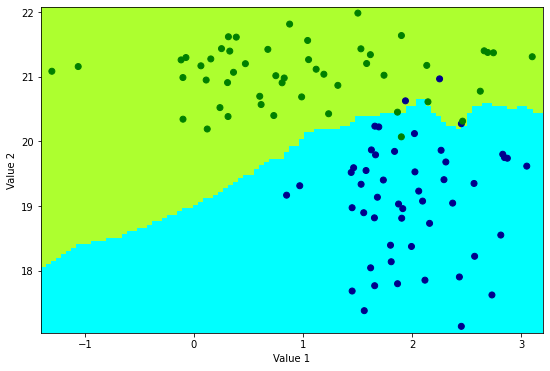

In [285]:

cmap_light = ListedColormap(["greenyellow", "cyan"])
cmap_bold = ListedColormap(["green", "darkblue"])


x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



################################ Plot #########################################

plt.figure(figsize=(9,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.axis('tight')

plt.show()




# **Predicciones sobre nuestros datos de prueba**

In [286]:
prediction = knn.predict(X_test)

# Predice las etiquetas de clase para los datos proporcionados.

# **Precisión del modelo**

Confirmemos la precisión del modelo viendo la Matriz de Confusión y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

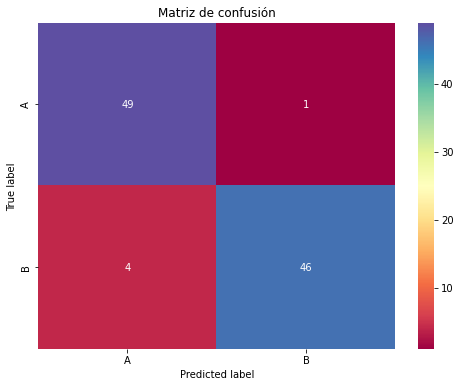

True positive =  49
False positive =  1
False negative =  4
True negative =  46


In [287]:
#Calculamos la matriz de confusión utilizando las predicciones realizadas y las comparamos con el test y.

plt.figure(figsize = (8,6))
confusion_matrix1 = pd.crosstab(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(prediction), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix1, annot=True,cmap = 'Spectral')
plt.title("Matriz de confusión")

plt.show()



# def get_confusion_matrix_values(y_test, prediction):
#     cm = confusion_matrix(y_test, prediction)
#     return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

# TP, FP, FN, TN = get_confusion_matrix_values(y_test, prediction)

# print(TP, FP, FN, TN)

######## Componentes de la Matriz de Confusión ########

def print_confusion_matrix(y_test, prediction):
    cm = confusion_matrix(y_test, prediction)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])


print_confusion_matrix(y_test, prediction)




# **Calculamos algunas  métricas de clasificación**

In [288]:
cm = metrics.confusion_matrix(y_test, prediction)

TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]


accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)

print('Accuracy:', accuracy)
print('Value 1 Predictive Value - Precision:', round(precision_value1,2))
print('Value 2 Predictive Value - Precision:', round(precision_value2,2))
print('Recall:', recall)
print('f-measure:', round(f_meas,2))


Accuracy: 0.95
Value 1 Predictive Value - Precision: 0.92
Value 2 Predictive Value - Precision: 0.98
Recall: 0.98
f-measure: 0.95


# **Otra forma de calcular la Matriz de Confusión y  las principales métricas de clasificación**.


Usamos :

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [289]:

pred = knn.predict(X_test)
target_names = ['Value 1 Predictive Value', 'Value 2 Predictive Value']

#############################################################


print('Matriz de Confusión:',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names=target_names))


# The reported averages include :

# macro average (averaging the unweighted mean per label), 

# weighted average (averaging the support-weighted mean per label), and sample 
#average (only for multilabel classification). 

# Micro average (averaging the total true positives, false negatives and false positives)
# is only shown for multi-label or multi-class with a subset of classes, 
#because it corresponds to accuracy otherwise and would be the same for all metrics. 



Matriz de Confusión: [[49  1]
 [ 4 46]]
                          precision    recall  f1-score   support

Value 1 Predictive Value       0.92      0.98      0.95        50
Value 2 Predictive Value       0.98      0.92      0.95        50

                accuracy                           0.95       100
               macro avg       0.95      0.95      0.95       100
            weighted avg       0.95      0.95      0.95       100



# **Comentario**


###### Teniendo en cuenta -->   n_neighbors=10 , el modelo presentó buena respuesta en las métricas calculadas. 

###### Considerando las predicciones y comparándolas con el conjunto de datos de prueba, se obtuvo una accuracy del 95 % y  una precision del 92% y 98% para cada variable respectivamente, y un f-measure del 95 %. Se aprecian las fronteras claramente definidas.

# **Comparación de la tasa de error (Rate Error) con el valor K**

##### En la sección de entrenamiento y predicción no hay forma de saber de antemano qué valor de K da los mejores resultados en el primer intento. Elegimos aleatoriamente 10 como el valor K y resultó en un 95% de Accuracy.

##### Una forma de encontrar el mejor valor de K es trazar el gráfico del valor de K y la tasa de error correspondiente para el conjunto de datos.

##### Por lo tanto, trazaremos el error medio de los valores pronosticados del conjunto de prueba para todos los valores de K entre 1 y 50.

##### Para hacerlo, primero calculemos la media del error para todos los valores pronosticados donde K oscila entre 1 y 50

Best Error Rate: 0.05
Best value k for Error Rate: 9


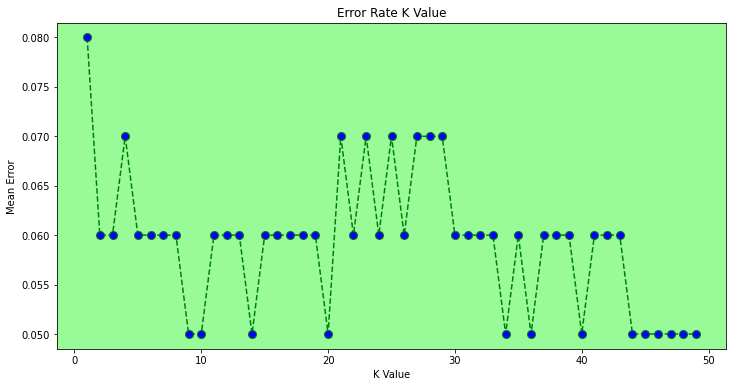

<Figure size 432x288 with 0 Axes>

In [290]:

error = []

# Calculamos el error para valores  K comprendido entre 1 y 50

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

print('Best Error Rate:', min(error))
print('Best value k for Error Rate:', error.index(min(error))+1)

#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("palegreen")


plt.plot(range(1,50), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.figure("lightgreen")
plt.show()


# **Ploteo Accurary Vs. K Value**


Best Accuracy: 0.95
Best Value k for Accuracy: 9


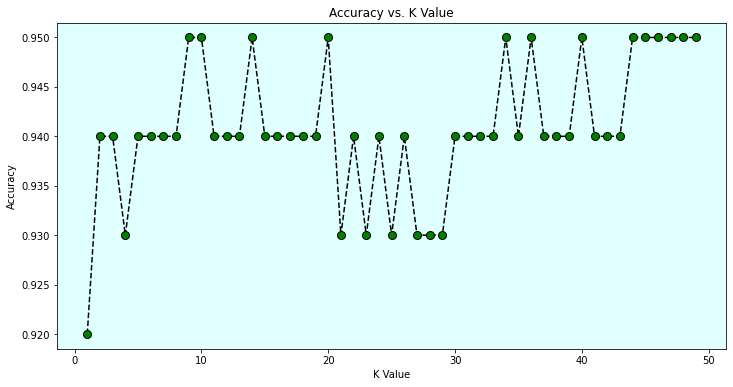

<Figure size 432x288 with 0 Axes>

In [291]:
accuracy = []

for i in range(1, 50):

    
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    prediction = knn.predict(X_test)

    # Calculamos la Matriz de Confusion usando las predicciones realizada 
    # y comparandolo con el y_test.

    cm = metrics.confusion_matrix(y_test, prediction)

    #Calculamos algunas metricas

    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    acc = (TP+TN)/(TP+FP+FN+TN)
    accuracy.append(acc)
    

print('Best Accuracy:', max(accuracy))
print('Best Value k for Accuracy:', accuracy.index(max(accuracy))+1)


#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("lightcyan")


plt.plot(range(1,50), accuracy, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.figure("lightgreen")
plt.show()



# **Comentario**

Si analizamos los graficos, podemos observar los mejores resultados en las metricas para el análisis de k = 9 vecinos, utilizando dicho valor, el clasificador tiene un 95% de precisión y solo un 5% de tasa de error, lo cual es un gran resultado. 


# **Comportamiento del Modelo - Otro caso**

## **Consideramos --   80% Train / 20% Test** 


Se analiza el comportamiento del modelo, para distintos K, tomando un 80% del dataset para entrenamiento y 20% para prueba.

# **Dataset - Entrenamiento (Train)**

In [292]:
dataset_train_1 = dataset_union(dataset_A[0:80], dataset_B[0:80])

dataset_train_1[0:10] #  Mostramos algunos datos como resultado 

# dataset_train

,Value 1,Value 2,Dataset
0,1.050808,21.264733,A
1,1.762011,20.840099,A
2,-0.142518,21.519412,A
3,1.319039,20.866891,A
4,-0.396496,20.051820,A
5,0.701907,20.851679,A
6,2.413987,18.712692,B
7,2.450428,17.142018,B
8,2.438084,18.751365,B
9,1.617203,21.341276,A


# **Dataset - Test (Prueba)**

In [293]:
dataset_test_1 = dataset_union(dataset_A[80:100], dataset_B[80:100])

dataset_test_1[0:10] #  Mostramos algunos datos como resultado 


,Value 1,Value 2,Dataset
0,2.092578,19.369493,B
1,2.188782,19.240737,B
2,2.205026,20.293226,B
3,1.043597,21.210141,A
4,1.828073,19.602319,B
5,2.198918,21.580169,A
6,1.186561,21.251592,A
7,0.656146,21.301160,A
8,0.329338,21.281381,A
9,1.690000,19.810952,B


# **Dividimos los Atributos (Features) y Objetivos (Target)**

In [294]:
# Columnas de atributos

columns_atrib_1 = ['Value 1', 'Value 2']

# Columna de target

column_target_1 = 'Dataset'


# Conjunto de datos original que se utilizará como modelo de entrenamiento(capacitación)

X_train_1, y_train_1 = dataset_train_1[columns_atrib_1].values, dataset_train_1[column_target_1].values


# Esta parte de los datos no participa en la capacitación del modelo, 
# pero que se usa para evaluar que tan bueno es el modelo 

X_test_1, y_test_1 = dataset_test_1[columns_atrib_1].values, dataset_test_1[column_target_1].values



# LabelEncoder convierte una lista de datos de texto en valores numéricos

# Transformamos los target (objetivos) en variables 

# El método fit_transform nos permite entrenar el codificador y transformar
# el conjunto de datos simultáneamente


label_encoder = LabelEncoder()
y_train_1 = label_encoder.fit_transform(y_train_1)
y_test_1 = label_encoder.fit_transform(y_test_1)


# **Clasificador K vecinos más cercanos - KNeighborsClassifier** 

In [295]:

# n_neighbors=5

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_1, y_train_1) # Ajusta el clasificador de k vecinos más cercanos del conjunto de 
                          #datos de entrenamiento.

KNeighborsClassifier()

# **Ploteo**

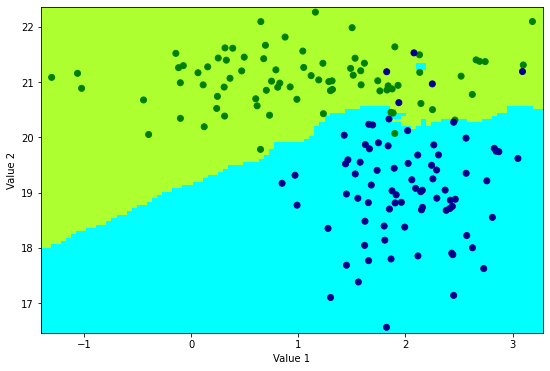

In [296]:


cmap_light = ListedColormap(["greenyellow", "cyan"])
cmap_bold = ListedColormap(["green", "darkblue"])


x_min, x_max = X_train_1[:, 0].min() - .1, X_train_1[:, 0].max() + .1
y_min, y_max = X_train_1[:, 1].min() - .1, X_train_1[:, 1].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



################################ Plot #########################################

plt.figure(figsize=(9,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cmap_bold)
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.axis('tight')

plt.show()




# **Predicciones sobre nuestros datos de prueba**

In [297]:
prediction_1 = knn.predict(X_test_1)

# Predice las etiquetas de clase para los datos proporcionados..

# **Precisión del modelo**

Confirmemos la precisión del modelo viendo la Matriz de Confusión y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

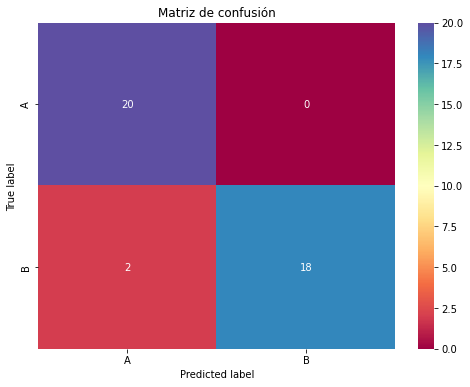

True positive =  20
False positive =  0
False negative =  2
True negative =  18


In [298]:
#Calculamos la matriz de confusión utilizando las predicciones realizadas y las comparamos con el test y.

plt.figure(figsize = (8,6))
confusion_matrix2 = pd.crosstab(label_encoder.inverse_transform(y_test_1), label_encoder.inverse_transform(prediction_1), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix2, annot=True,cmap = 'Spectral')
plt.title("Matriz de confusión")

plt.show()



# def get_confusion_matrix_values(y_test, prediction):
#     cm = confusion_matrix(y_test, prediction)
#     return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

# TP, FP, FN, TN = get_confusion_matrix_values(y_test, prediction)

# print(TP, FP, FN, TN)

######## Componentes de la Matriz de Confusión ########

def print_confusion_matrix(y_test, prediction):
    cm = confusion_matrix(y_test, prediction)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])


print_confusion_matrix(y_test_1, prediction_1)

# **Calculamos algunas  métricas de clasificación**

In [299]:
cm_1 = metrics.confusion_matrix(y_test_1, prediction_1)

TP_, FP_, FN_, TN_ = cm_1[0,0], cm_1[1,0], cm_1[0,1], cm_1[1,1]


accuracy_ = (TP_+TN_)/(TP_+FP_+FN_+TN_)
precision_value1_ = TP_/(TP_+FP_)
precision_value2_ = TN_/(FN_+TN_)
recall_ = TP_/(TP_+FN_)
f_meas_ = (2*precision_value1_*recall_)/(precision_value1_+recall_)

print('Accuracy:', accuracy_)
print('Value 1 Predictive Value - Precision:', round(precision_value1_,2))
print('Value 2 Predictive Value - Precision:', round(precision_value2_,2))
print('Recall:', recall_)
print('f-measure:', round(f_meas_,2))


Accuracy: 0.95
Value 1 Predictive Value - Precision: 0.91
Value 2 Predictive Value - Precision: 1.0
Recall: 1.0
f-measure: 0.95


# **Comparación de la tasa de error (Rate Error) con el valor K**

Best Error Rate: 0.025
Best value k for Error Rate: 3


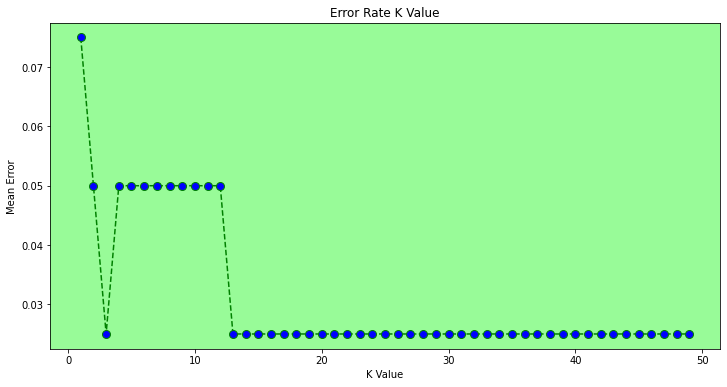

<Figure size 432x288 with 0 Axes>

In [300]:


error_ = []

# Calculamos el error para valores  K comprendido entre 1 y 50

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_1, y_train_1)
    pred_i = knn.predict(X_test_1)
    error_.append(np.mean(pred_i!=y_test_1))

print('Best Error Rate:', min(error_))
print('Best value k for Error Rate:', error_.index(min(error_))+1)

#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("palegreen")


plt.plot(range(1,50), error_, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.figure("lightgreen")
plt.show()


# **Ploteo Accurary Vs. K Value**


Best Accuracy: 0.975
Best Value k for Accuracy: 3


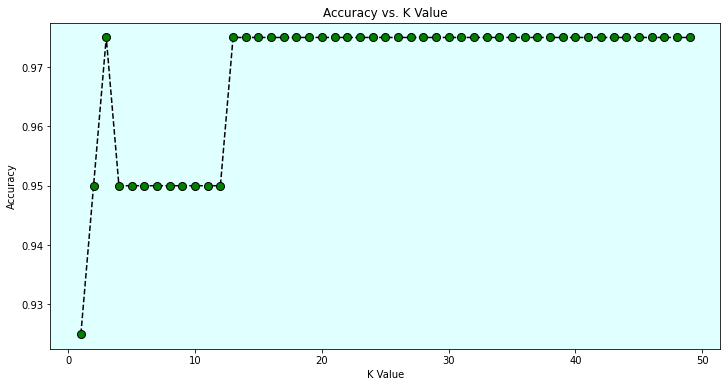

<Figure size 432x288 with 0 Axes>

In [301]:
accuracy_ = []

for i in range(1, 50):

    
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_1, y_train_1)

    prediction_1 = knn.predict(X_test_1)

    # Calculamos la Matriz de Confusion usando las predicciones realizada 
    # y comparandolo con el y_test.

    cm = metrics.confusion_matrix(y_test_1, prediction_1)

    #Calculamos algunas metricas

    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    acc_ = (TP+TN)/(TP+FP+FN+TN)
    accuracy_.append(acc_)
    

print('Best Accuracy:', max(accuracy_))
print('Best Value k for Accuracy:', accuracy_.index(max(accuracy_))+1)


#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("lightcyan")


plt.plot(range(1,50), accuracy_, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.figure("lightgreen")
plt.show()



# **Comentario**


*   Podemos apreciar que para una división del 50% de datos (K = 10)tanto para
entrenamiento como para prueba, se obtienen mejores resultados en los metricas calculadas (parámetros de calidad) del modelo respecto a tomar 80% para entrenamiento y 20% para prueba considerando k = 5.


*  Aunque Para la division de datos ( 80 % train - 20 % test), se obtiene un 
Best Error Rate = 0.025 para un k = 3. Por otro lado se obtiene un mejor Accuracy = 97.5 % para dicho valor de k . A su vez se tiene un amplio rango de k ( 13 - 49 )con  Accuracy = 97.5 % en comparacion con la division de datos (50 % train - 50 % test).


# **Ejercicio 3.2**



En el notebook :

https://github.com/manlio99/Materia-deaprendizaje/blob/master/3_MidtermProjects/musica.ipynb


hay un dataset con 2000+ canciones de Spotify de una usuaria, donde algunas
fueron marcadas como gustadas y otras no. 


Cada canción tiene a su vez 16 atributos (nombre, artista, duración, bailable, etc.). Desarrollar un clasificador que prediga si una canción dada va a ser
gustada o no. Aclarar y justificar los pasos, analizar y explicar los resultados.

# **Leemos el Dataset**

In [302]:
attrib_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attrib_spotify = attrib_spotify.drop(columns=["Unnamed: 0"])
attrib_spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


# **Parámetros Estadísticos**

In [303]:
attrib_spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# **Analizamos la correlación que existe sobre los datos de la columna**

Para clasificar las canciones utilizaremos los atributos  que son relevantes como variables de entrada.  Si revisamos el conjunto de datos, podemos observar
que algunas variables no proporcionan mucha informacion sobre la  variable que queremos predecir con el clasificador, es decir sobre el target(objetivo).

Por lo tanto, variables como 'song tittle', 'key', 'mode' y 'time_signature' no se consideran relevantes para el analisis ( No colabora a definir si la canción va ha ser del agrado de una persona).

In [304]:
attrib_spotify.corr()['target']

acousticness       -0.129627
danceability        0.176706
duration_ms         0.146749
energy              0.039688
instrumentalness    0.152594
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
speechiness         0.154006
tempo               0.034732
time_signature      0.040182
valence             0.107930
target              1.000000
Name: target, dtype: float64

# **Comportamiento del Clasificador**

In [305]:
# Transformamos algunos atributos ('key' y 'mode') en variables ficticias para realizar el cálculo del clasificador.

le = LabelEncoder()
attrib_spotify['key'] = le.fit_transform(attrib_spotify['key'])
attrib_spotify['mode'] = le.fit_transform(attrib_spotify['mode'])


# **Análisis  de las variables (atributos) relevantes como datos de entrada**

In [306]:
# Separamos las variables del target

variables_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo','valence']

X, y = attrib_spotify[variables_columns], attrib_spotify['target']


# **KNeighborsClassifier**

In [307]:
# Generamos un nuevo modelo knn

knn2 = neighbors.KNeighborsClassifier()

# Creamos un Diccionario (Hiperparametros) de todos los valores que queremos probar para n_neighbors

params_grid_2 = {'n_neighbors': np.arange(1, 100)}


# utilizamos gridsearch para probar todos los valores de n_neighbors
# usando 10 divisiones de validaciones cruzadas.

# # CV - Validacion Cruzada

# # El objetivo de la validación cruzada o cross-validation es garantizar que los resultados
# # que obtengamos sean independientes de la partición entre datos de entrenamiento y 
# #datos de validación.
# #Consiste en repetir y calcular la media aritmética de las medidas de evaluación que obtenemos sobre
# # diferentes particiones. En este caso, vamos a utilizar un proceso de validación cruzada con 10 interacciones. 
# # Eso significa que nuestro conjunto de datos de entrenamiento, se divide en 10 partes, entrena en 9, 
# # valida en 1 y repite el proceso 10 veces. 


knn_gscv_2 = GridSearchCV(knn2, params_grid_2, cv=10)


# Ajustamos el modelo a los datos
knn_gscv_2.fit(X, y)

# verificamos el valor de n_neighbors de mayor performance

print(knn_gscv_2.best_params_)
print(np.round(knn_gscv_2.best_score_,2))




{'n_neighbors': 41}
0.59


# **Ploteo**

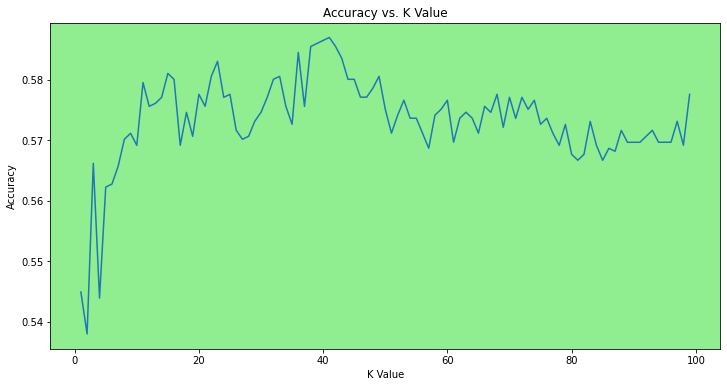

In [308]:
plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("lightgreen")


plt.plot(knn_gscv_2.cv_results_['param_n_neighbors'].data, knn_gscv_2.cv_results_['mean_test_score'])
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

plt.show()




# **Comentario**




Utilizando las variables relevantes ( Sin considerar la columna 'Unnamed' y soslayando algunas variables mencionadas al inicio) se obtuvo un 59 % de Accuracy. Lo cual no es un resultado favorable.

Por otro lado, podemos apreciar en el conjunto de datos que las variables (atributos) presentan diferentes escalas, por ende, algunas variables como 'duration_ms', 'loudness' pueden tener mas incidencia que otras. 

Por lo tanto, es importante que normalicemos todas las variables que consideraremos para el clasificador.



#**Normalización de valores - StandardScaler()**

In [309]:
# StandardScaler se usa para cambiar el tamaño de la distribución de valores para que la media de
# los valores observados sea 0 y la desviación estándar sea 1, garatizando que el modelo no sea sensible
# a la escala arbritaria de los datos.

# Utilizamos  Standar Scaler para normalizar el dataset

scaler = StandardScaler()

#Separamos las variables del targets

variables_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo','valence']
X, y = attrib_spotify[variables_columns], attrib_spotify['target']

#Fit standard scaler

# Ajustamos el escalador usando los datos de entrenamiento disponibles.
# Para la normalización, esto significa que los datos de entrenamiento se
# utilizarán para estimar los valores mínimos y máximos observables. 

scaler.fit(X)

# Normalizacion de las variables

# transformacion de los datos, de modo que la distribución tenga un valor medio
#  de 0 y una desviación estándar de 1.

X_new = scaler.transform(X)
X_norm = pd.DataFrame(X_new, columns=X.columns)
X_norm

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.346454,-0.881573,-0.147529,1.442323,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.204897,-0.016586,2.183712,-1.745166,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,1.596735,-1.213155,-0.258753,1.964120,1.647627
...,...,...,...,...,...,...,...,...,...,...
2012,-0.717631,-0.213815,0.342817,1.191237,-0.478206,-0.397929,0.953167,2.673095,-1.747715,-1.156518
2013,-0.384304,1.711782,-0.782370,1.000961,-0.481941,-0.888231,1.175995,0.426383,-0.433385,1.497911
2014,-0.688738,0.115400,-0.477129,1.205508,-0.473446,0.148995,1.228112,0.159447,1.067459,-0.108504
2015,-0.715399,-0.381529,-0.740667,1.476651,1.990939,-0.640506,1.156850,0.448628,1.064798,0.510593


# **Parametros Estadísticos**

In [310]:
X_norm.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
mean,-4.238333e-18,5.201590e-16,-8.548222e-17,-3.764961e-17,1.751202e-16,-8.641795e-17,2.343468e-16,1.684324e-17,-2.842435e-16,2.870507e-17
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00
min,-7.216979e-01,-3.083576e+00,-2.809419e+00,-3.171793e+00,-4.880565e-01,-1.107000e+00,-6.916536e+00,-7.737170e-01,-2.764133e+00,-1.869491e+00
25%,-6.846597e-01,-6.486275e-01,-5.647920e-01,-5.640598e-01,-4.880565e-01,-6.340718e-01,-3.479027e-01,-6.135554e-01,-8.026643e-01,-8.166212e-01
50%,-4.781769e-01,7.813008e-02,-2.079659e-01,1.589892e-01,-4.877775e-01,-4.107981e-01,2.227279e-01,-4.200267e-01,-6.607136e-03,-1.948343e-02
75%,2.978168e-01,7.427716e-01,2.931475e-01,7.821433e-01,-2.903227e-01,3.613301e-01,6.221161e-01,1.705693e-01,6.089335e-01,7.857471e-01
max,3.106321e+00,2.270826e+00,9.252160e+00,1.505192e+00,3.085799e+00,5.006968e+00,1.802465e+00,8.045183e+00,3.663097e+00,2.003709e+00


# **Entrenamiento del Clasificador considerando la normalización de las variables**

In [311]:
# Generamos un nuevo modelo knn
knn3 = neighbors.KNeighborsClassifier()

# Creamos un Diccionario  de todos los valores que queremos probar para n_neighbors
params_grid_3 = {'n_neighbors': np.arange(1, 100)}

# # utilizamos gridsearch para probar todos los valores de n_neighbors
# usando 10 divisiones de validaciones cruzadas.


knn_gscv_3 = GridSearchCV(knn3, params_grid_3, cv=10)

# # Ajustamos el modelo a los datos

knn_gscv_3.fit(X_norm,y)


# verificamos el valor de n_neighbors de mayor performance

print(knn_gscv_3.best_params_)
print(np.round(knn_gscv_3.best_score_,3))



{'n_neighbors': 9}
0.7


# **Ploteo**

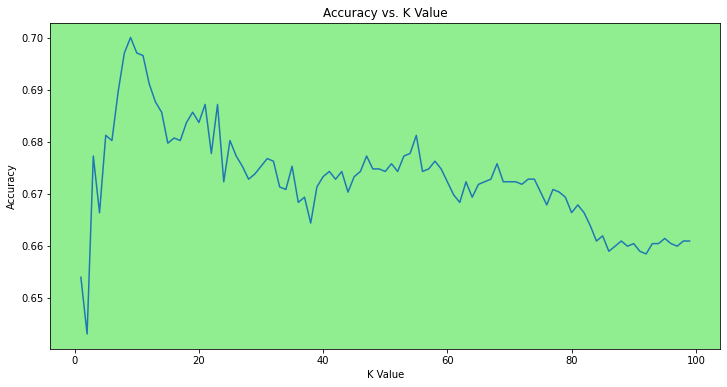

In [312]:
plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("lightgreen")


plt.plot(knn_gscv_3.cv_results_['param_n_neighbors'].data, knn_gscv_3.cv_results_['mean_test_score'])
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

plt.show()

# **Comentario**

Considerando las variables normalizadas, se obtiene un 70% de Accuracy. Dicho resultado es mejor en comparación con el anterior.

Por ende , es importante analizar y verificar la similitud de la escala de las variables ( atributos) , porque algunas variables pueden tener más prepondarancia que otras. Quizás para tener un modelo mejor , mas consistente , se deberia considerar más variables de entrada .